In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline

In [2]:
df1 = pd.read_json("data/1_0_0.json", lines=True)

In [3]:
df1.columns

Index(['dst_port', 'duration', 'eventid', 'password', 'sensor', 'session',
       'src_ip', 'src_port', 'ts', 'username'],
      dtype='object')

In [4]:
df1.password.value_counts()

support              10894
111111                6800
admin                 3956
root                  3010
password              2865
12345                 2511
123456                2381
1234                  1844
                      1806
user                  1208
guest                  983
xc3511                 981
1234567                854
default                820
1111                   791
ubnt                   763
test                   680
pass                   581
raspberry              571
toor                   548
123                    542
54321                  535
888888                 534
666666                 529
7ujMko0admin           501
service                500
p@ssw0rd#$             494
keypos                 480
1234567890             462
fucker                 441
                     ...  
informations             1
maurice                  1
porno                    1
abys                     1
windsor                  1
mashby123                1
a

In [3]:
# Now that we know a little about the data, let's make our dataset bigger.
df = df1
files = ["data/1_1_0.json", "data/1_2_0.json", "data/1_3_0.json", "data/1_4_0.json", "data/1_5_0.json" ,
         "data/1_6_0.json", "data/1_7_0.json", "data/1_8_0.json", "data/1_9_0.json", "data/1_10_0.json",
         "data/1_11_0.json", "data/1_12_0.json", "data/1_13_0.json", "data/1_14_0.json", "data/1_15_0.json",
         "data/1_16_0.json"]

In [4]:
tdf = pd.read_json("data/1_1_0.json", lines=True)
df.merge(tdf)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994335 entries, 0 to 6994334
Data columns (total 10 columns):
dst_port    float64
duration    float64
eventid     object
password    object
sensor      object
session     object
src_ip      object
src_port    float64
ts          object
username    object
dtypes: float64(3), object(7)
memory usage: 533.6+ MB


In [13]:
pwd_df = df.dropna(subset=['password'])
pwd_df.ts = pd.to_datetime(pwd_df.ts, infer_datetime_format=True)
pwd_df.ts = pwd_df.ts.map(lambda x: x.round("min")) # Aggregate by minutes
pwd_df.set_index(pwd_df.ts)

,dst_port,duration,eventid,password,sensor,session,src_ip,src_port,ts,username
ts,,,,,,,,,,
2016-11-01 04:02:00,NaN,NaN,cowrie.login.failed,password,hesienberg-collector-5,9dc7492a,200.124.19.146,NaN,2016-11-01 04:02:00,admin
2016-11-01 04:02:00,NaN,NaN,cowrie.login.failed,,hesienberg-collector-5,9dc7492a,200.124.19.146,NaN,2016-11-01 04:02:00,admin
2016-11-01 04:03:00,NaN,NaN,cowrie.login.failed,password,hesienberg-collector-5,9dc7492a,200.124.19.146,NaN,2016-11-01 04:03:00,admin
2016-11-01 04:09:00,NaN,NaN,cowrie.login.success,xc3511,hesienberg-collector-5,34681708,220.87.192.16,NaN,2016-11-01 04:09:00,root
2016-11-01 04:24:00,NaN,NaN,cowrie.login.failed,a,hesienberg-collector-5,c3e1a9be,112.220.226.10,NaN,2016-11-01 04:24:00,a
2016-11-01 04:24:00,NaN,NaN,cowrie.login.failed,oracle,hesienberg-collector-5,53b5acc8,112.220.226.10,NaN,2016-11-01 04:24:00,oracle
2016-11-01 04:24:00,NaN,NaN,cowrie.login.failed,123456,hesienberg-collector-5,de07c98a,112.220.226.10,NaN,2016-11-01 04:24:00,oracle
2016-11-01 04:24:00,NaN,NaN,cowrie.login.failed,123456,hesienberg-collector-5,91479e9c,112.220.226.10,NaN,2016-11-01 04:24:00,ubuntu
2016-11-01 04:24:00,NaN,NaN,cowrie.login.failed,ubuntu,hesienberg-collector-5,2491dfe0,112.220.226.10,NaN,2016-11-01 04:24:00,ubuntu


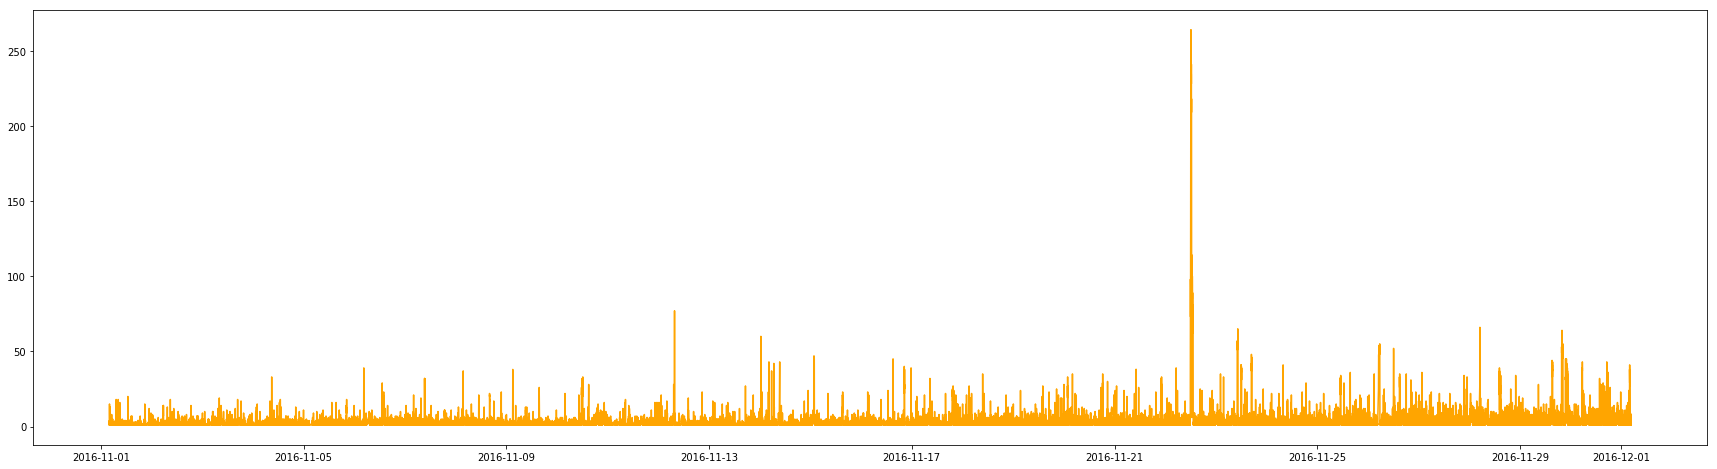

In [21]:
counts = pwd_df.ts.value_counts().sort_index()
plt.figure(figsize=(30,8))
sns.lineplot(data = counts, color='orange')


In [32]:
sensor_names = list(pwd_df.sensor.unique())
len(sensor_names)

24

In [37]:
pwd_df.sensor.value_counts()

heisenberg-collector-18    8733
heisenberg-collector-7     8362
heisenberg-collector-17    8041
heisenberg-collector-16    7191
heisenberg-collector-8     6714
heisenberg-collector-15    6301
heisenberg-collector-12    5975
heisenberg-collector-10    5508
heisenberg-collector-0     5184
heisenberg-collector-3     5168
heisenberg-collector-2     4690
heisenberg-collector-11    4551
heisenberg-collector-13    4276
heisenberg-collector-1     3586
heisenberg-collector-14    3536
heisenberg-collector-20    3261
heisenberg-collector-9     3153
heisenberg-collector-6     3021
heisenberg-collector-19    2533
heisenberg-collector-21    2451
heisenberg-collector-4     2314
heisenberg-collector-5     1965
hesienberg-collector-5       28
hesienberg-collector-8       14
Name: sensor, dtype: int64

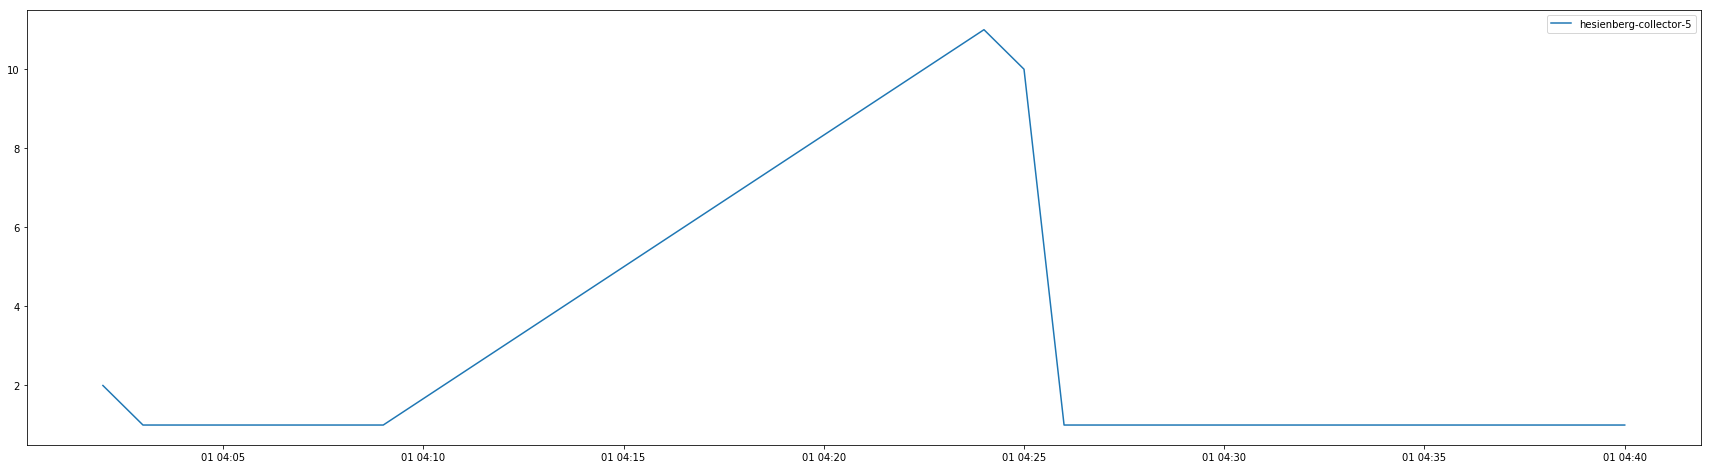

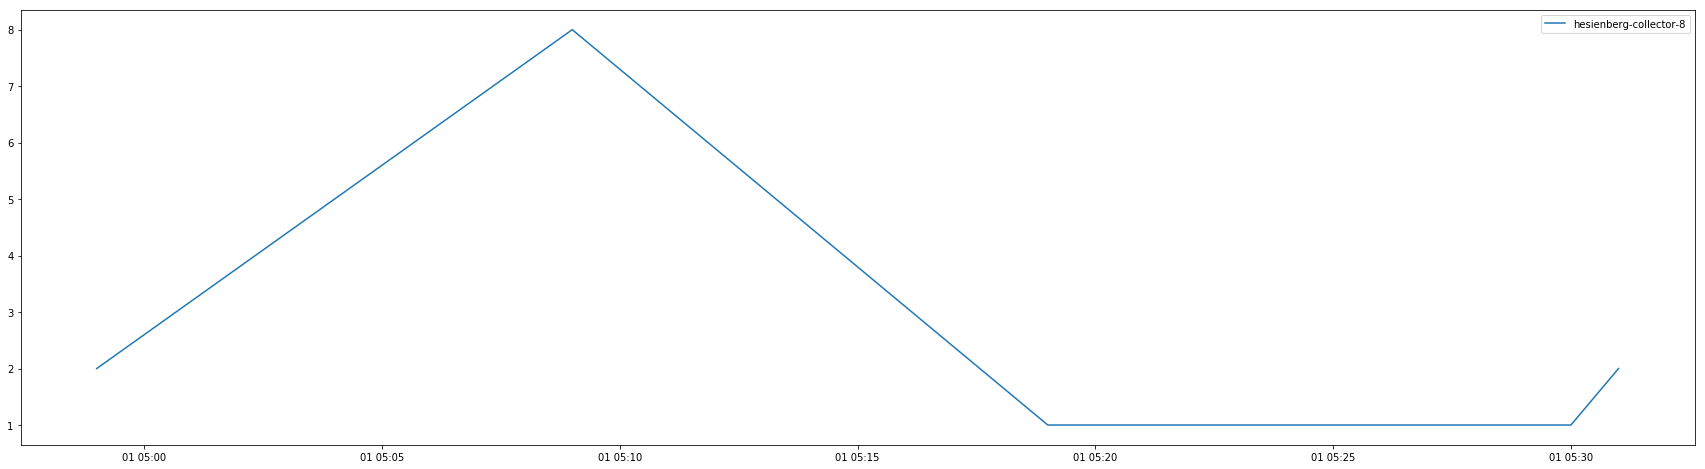

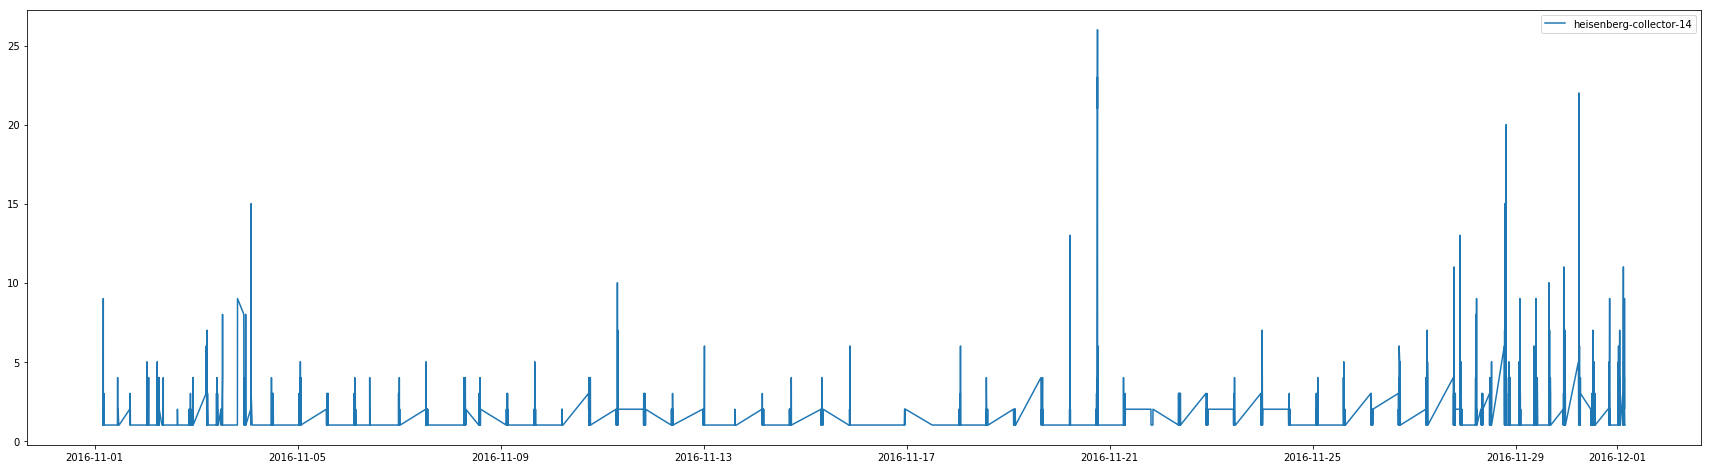

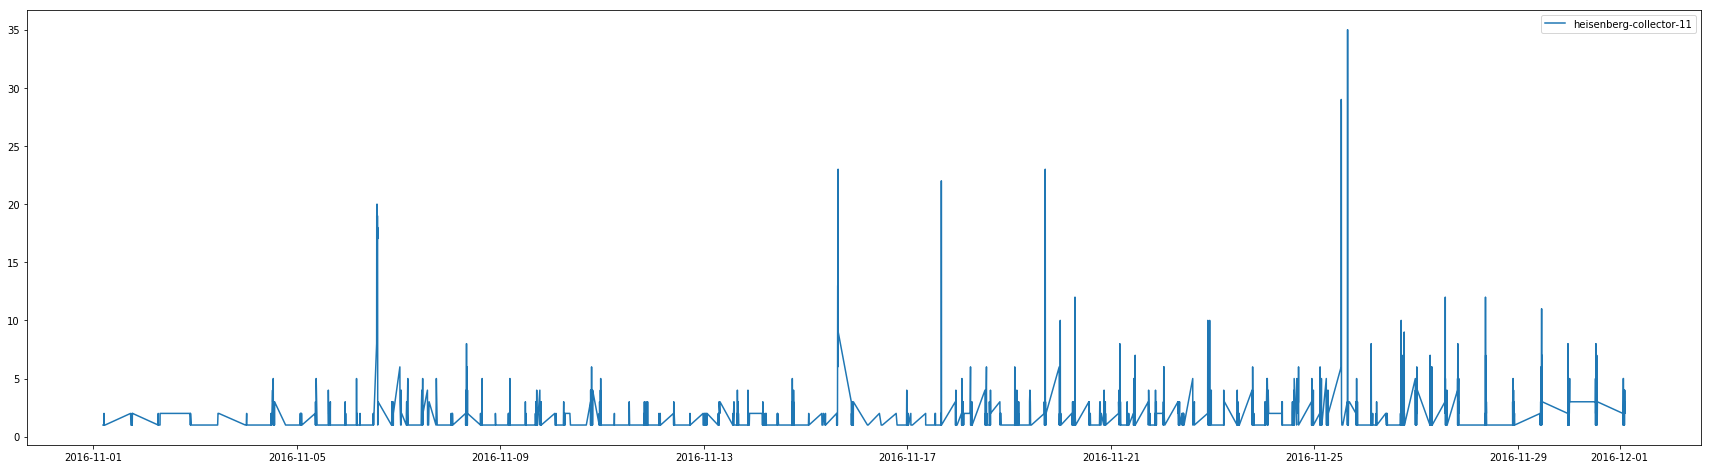

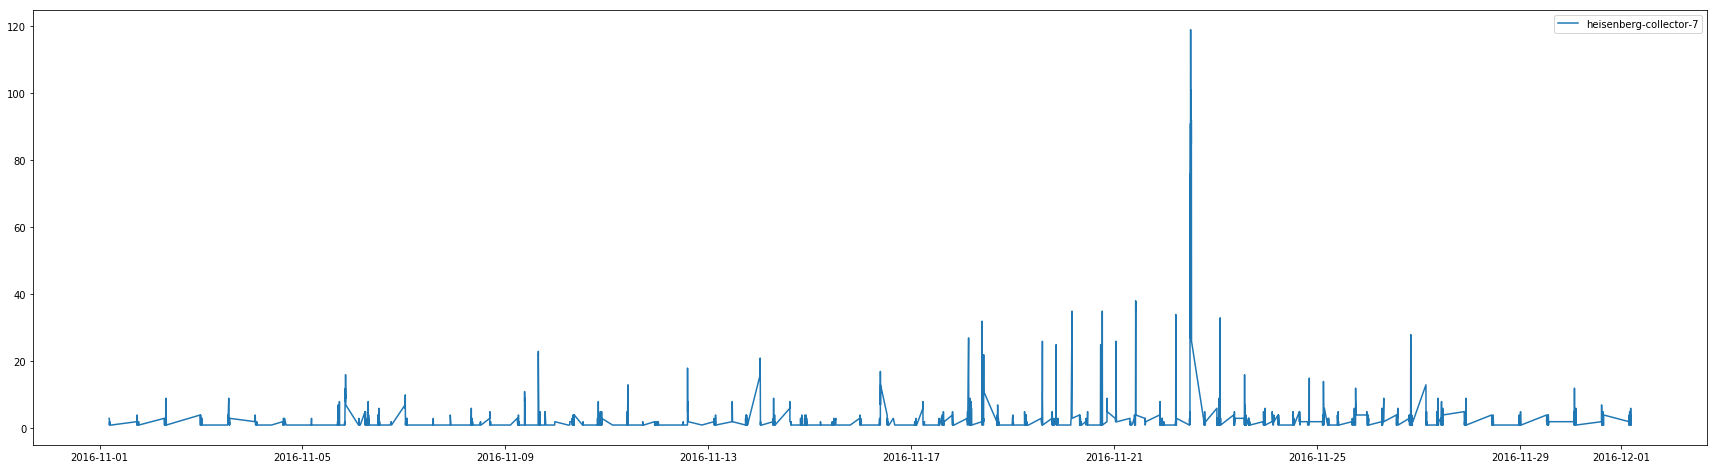

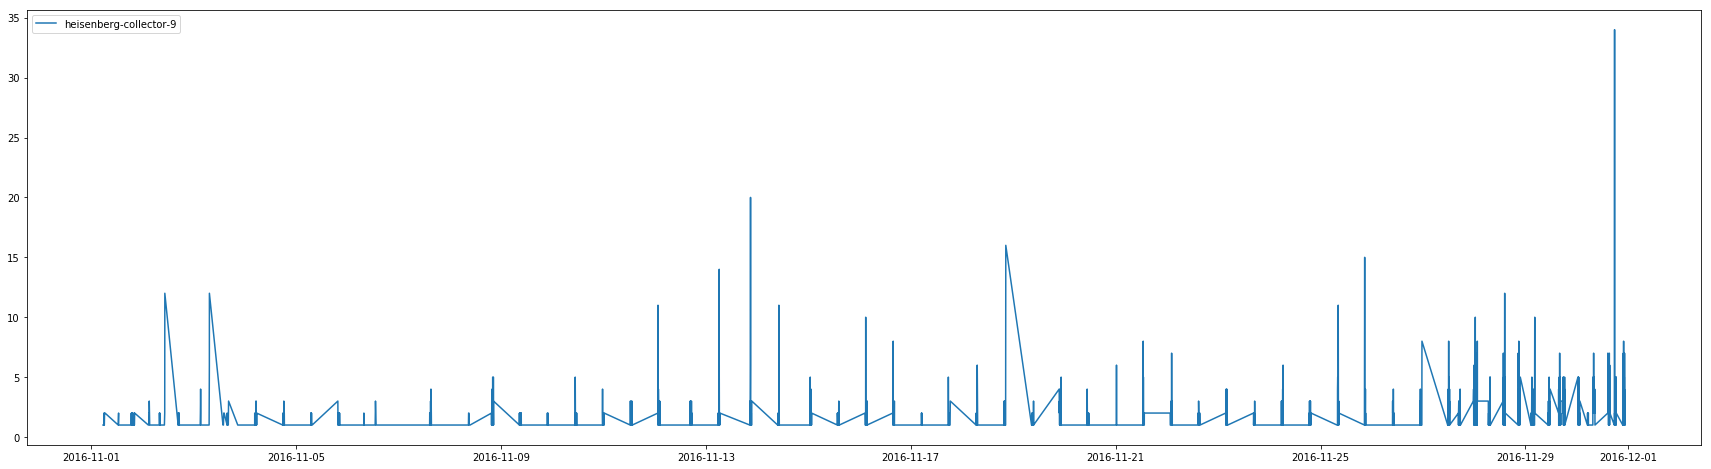

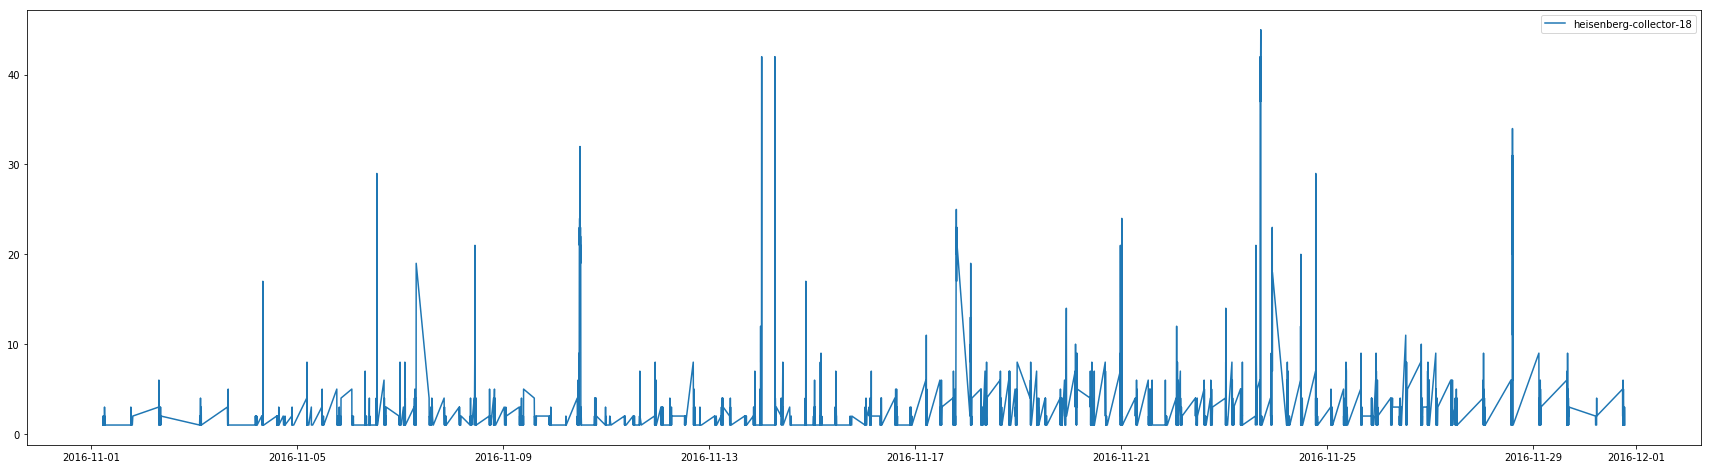

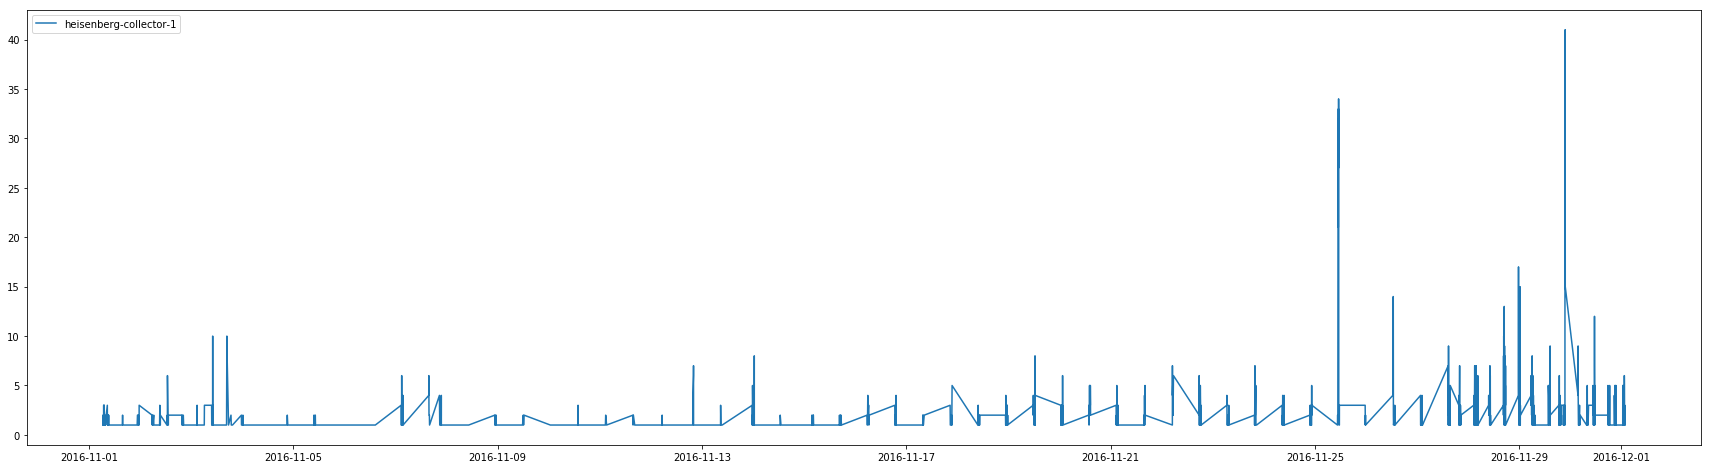

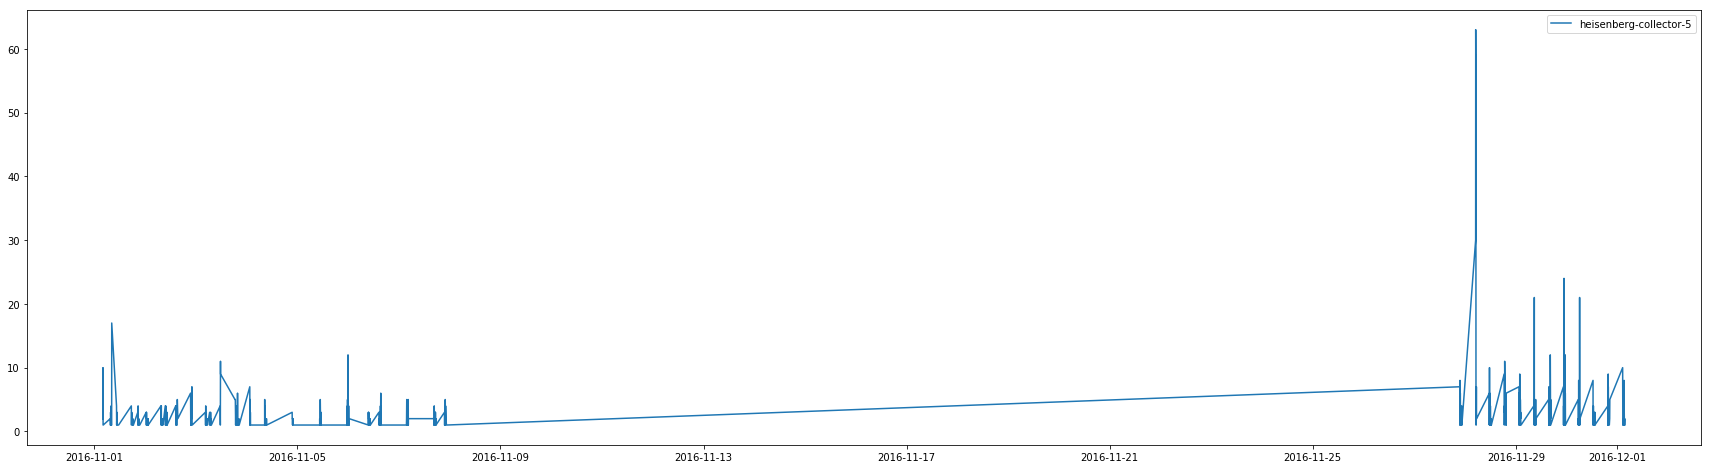

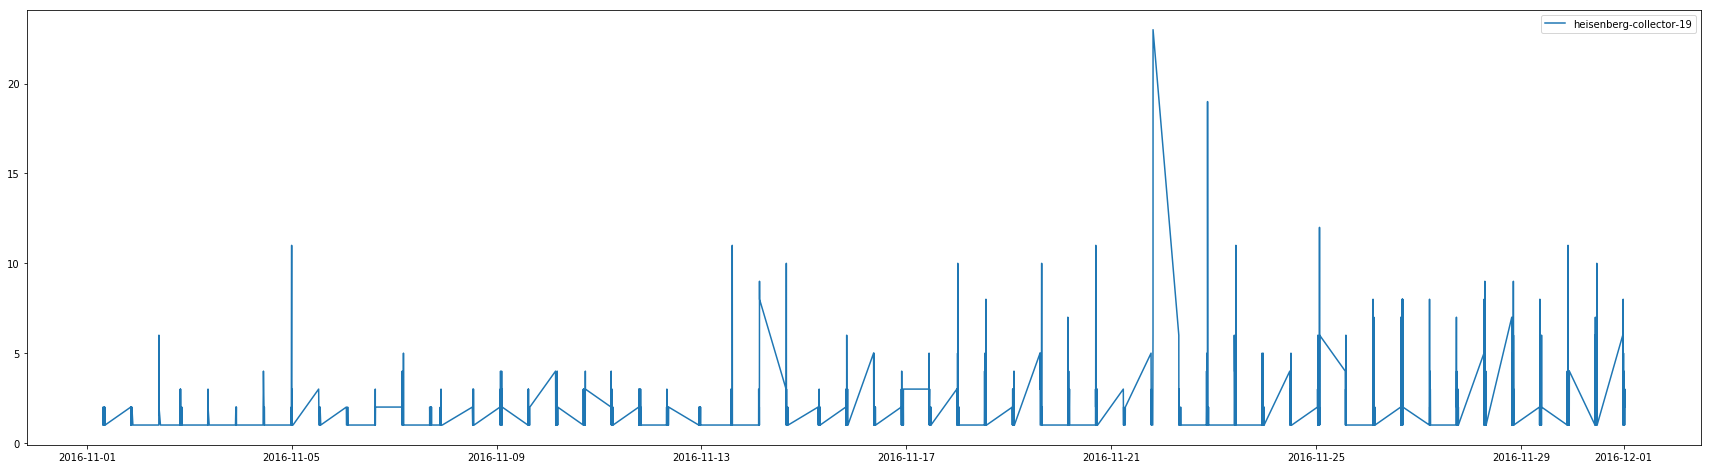

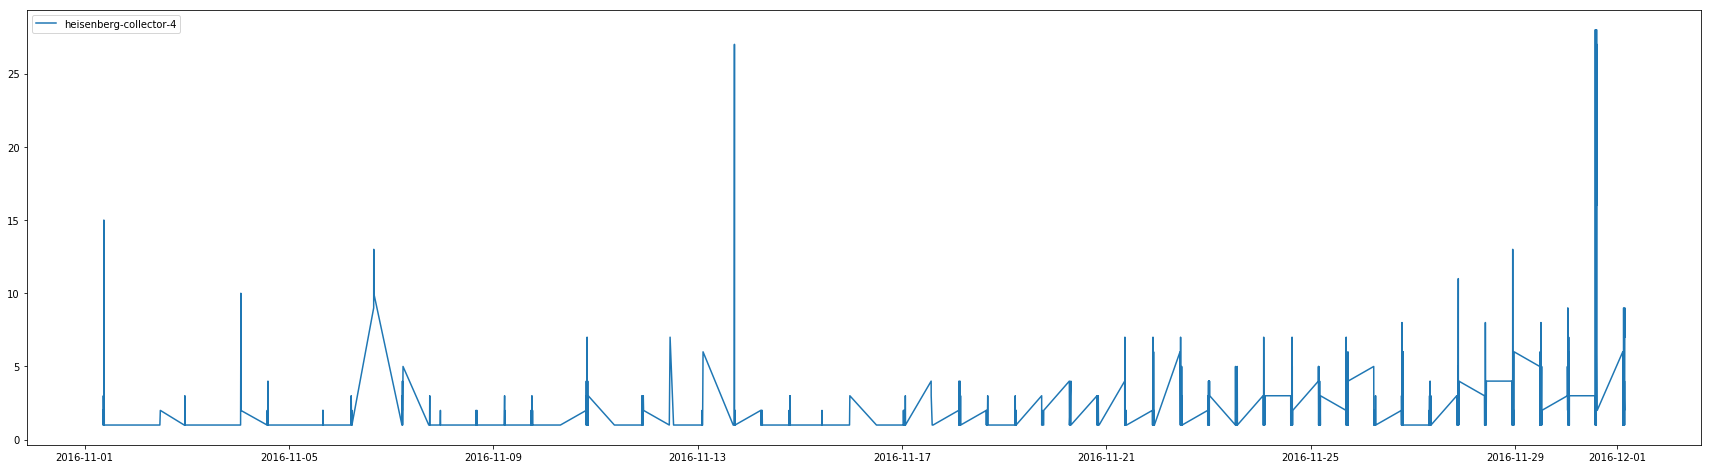

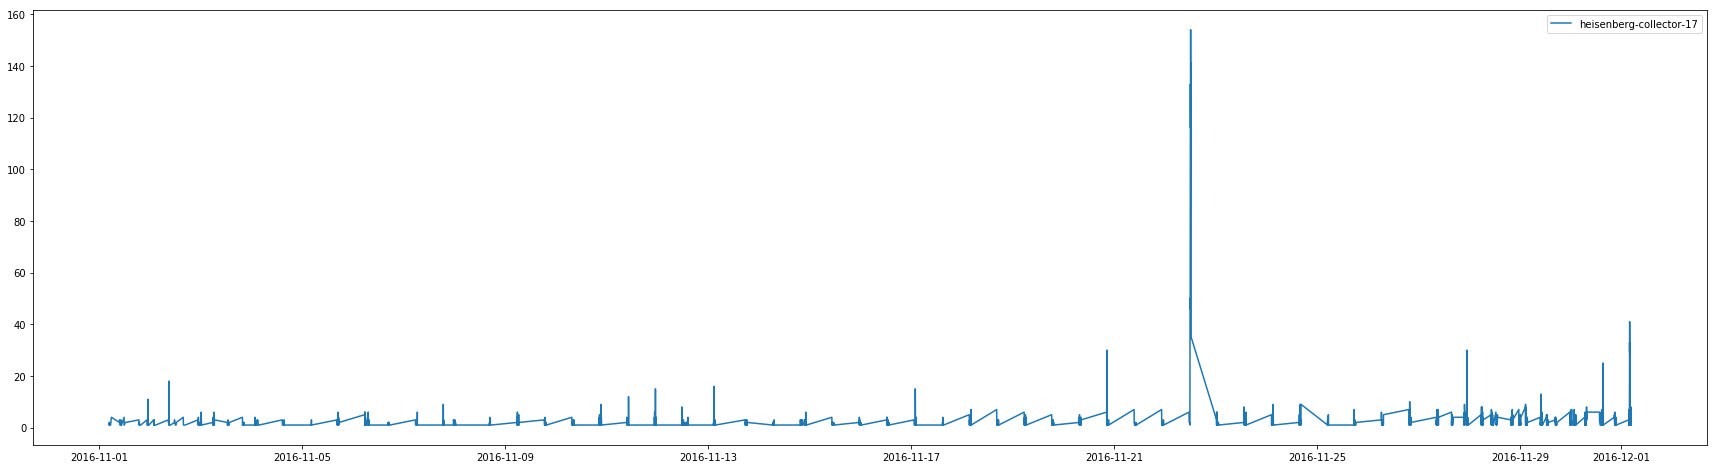

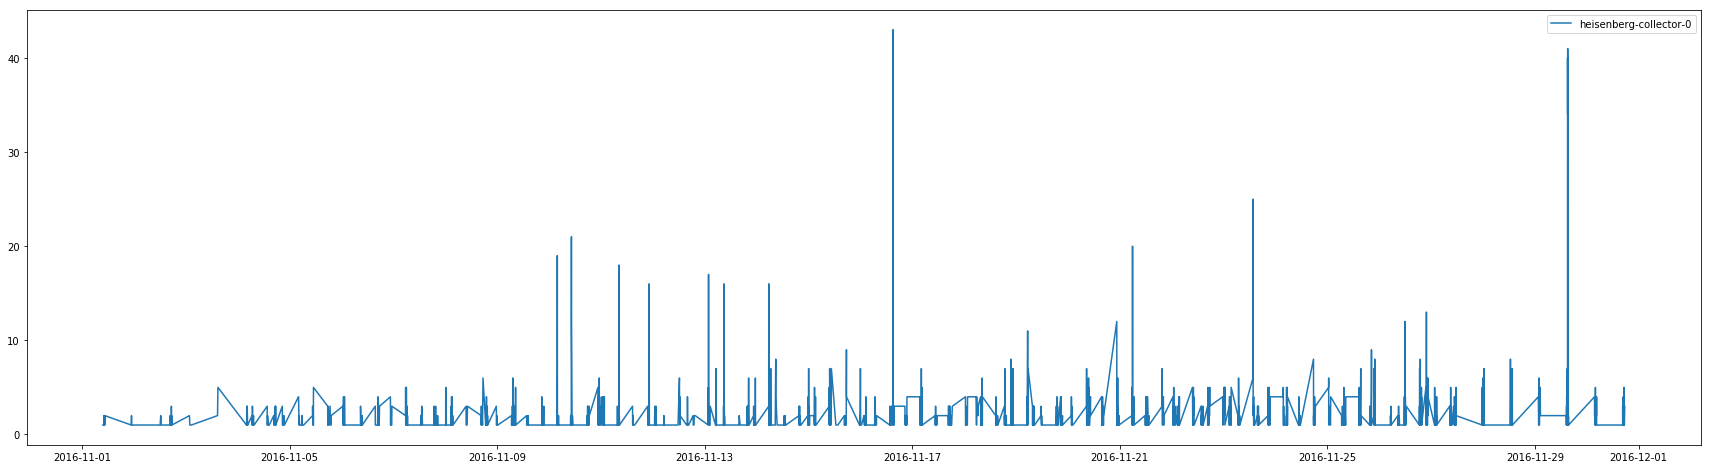

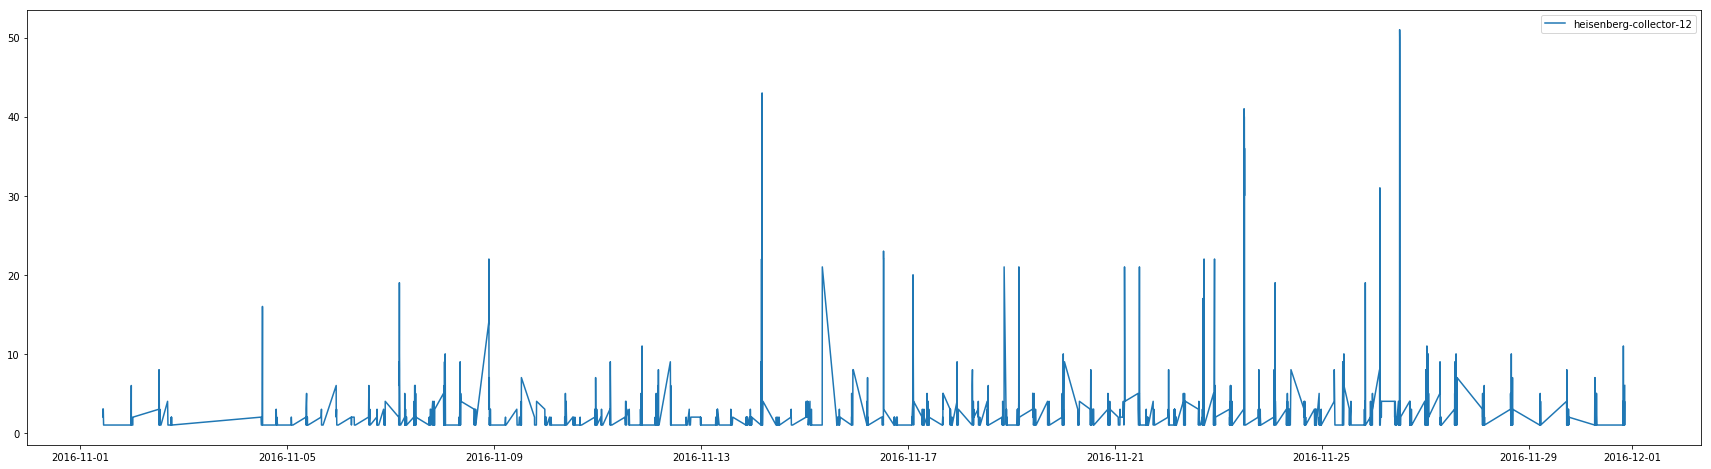

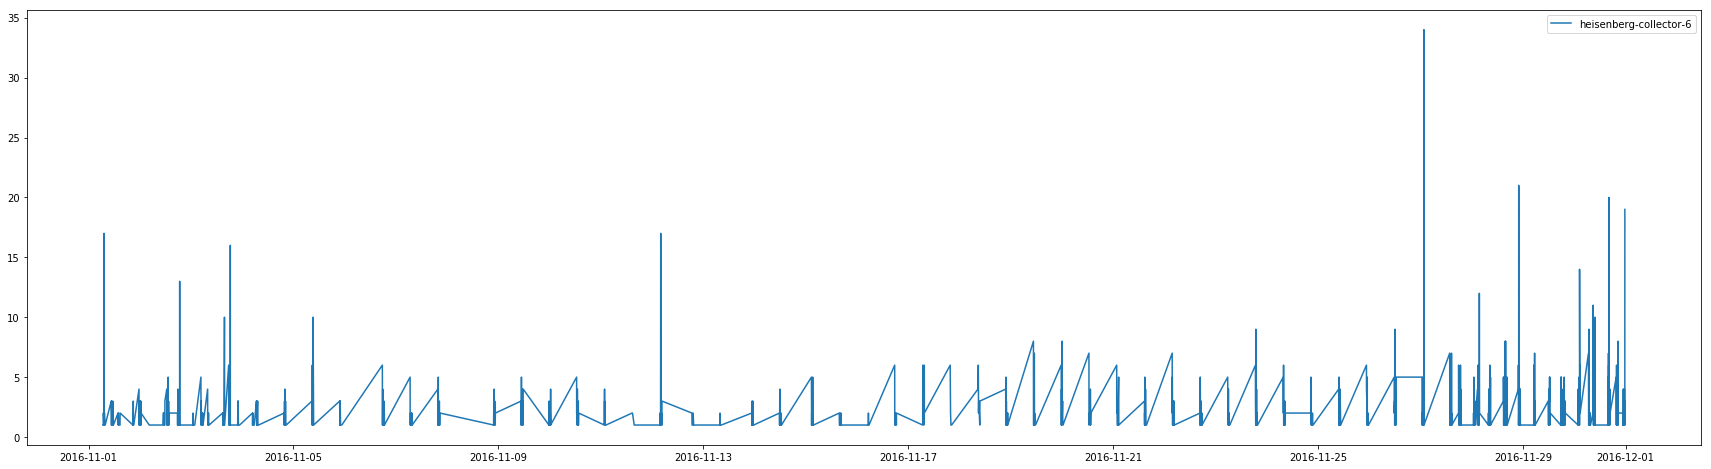

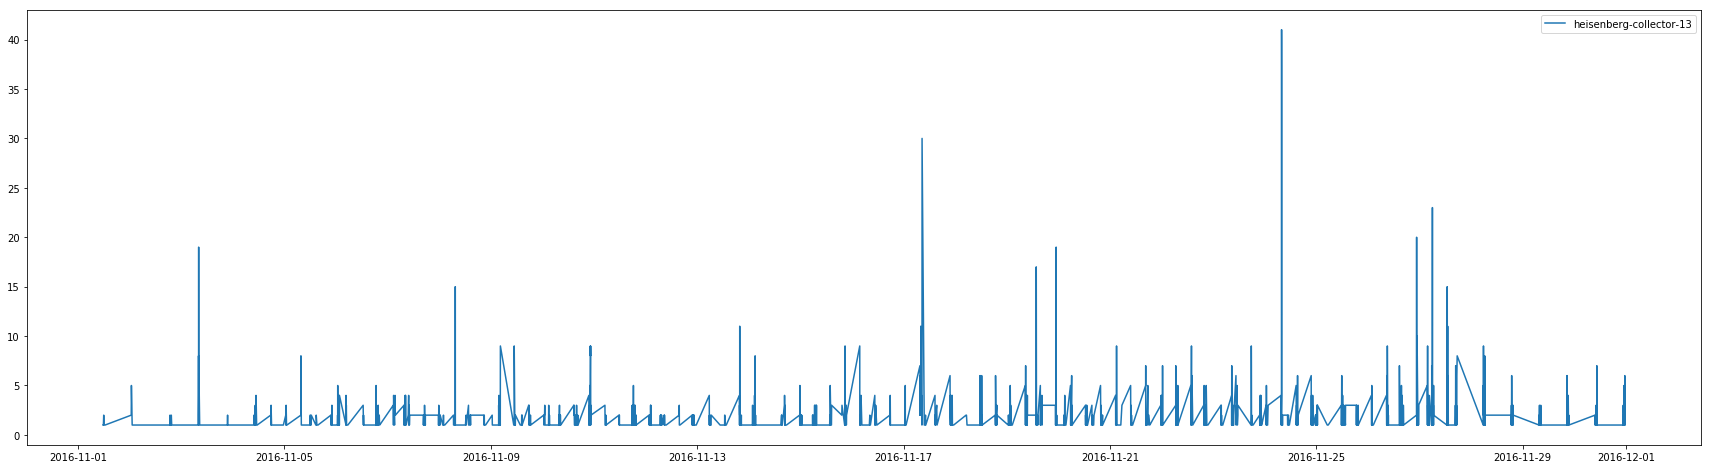

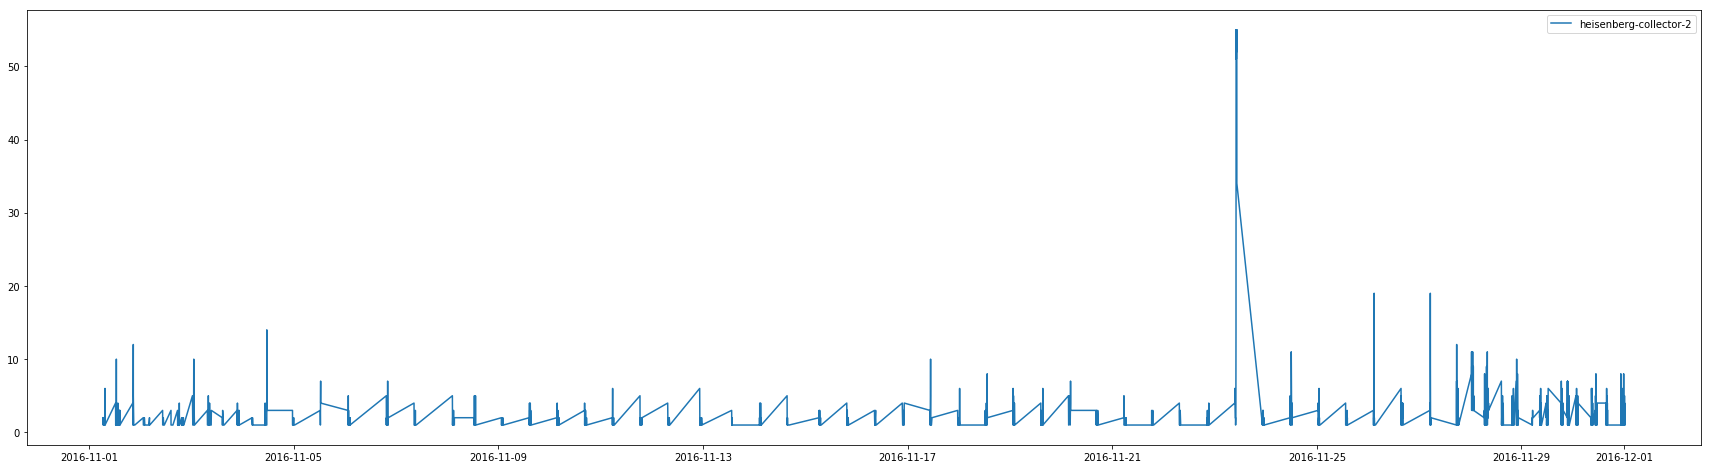

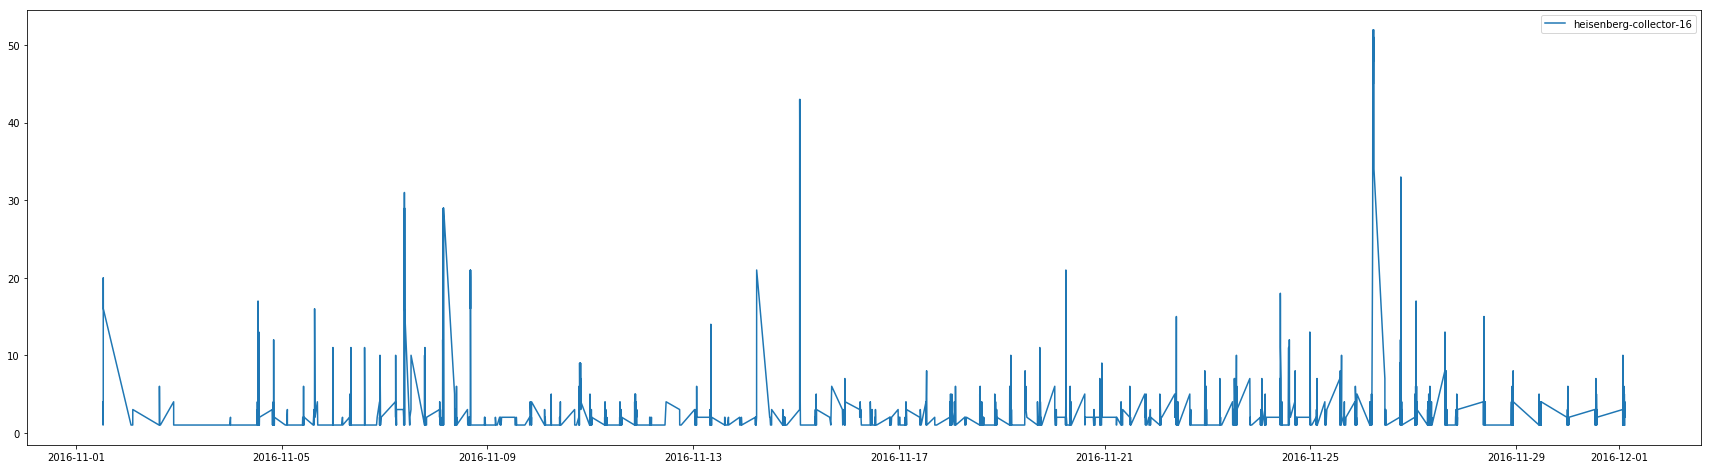

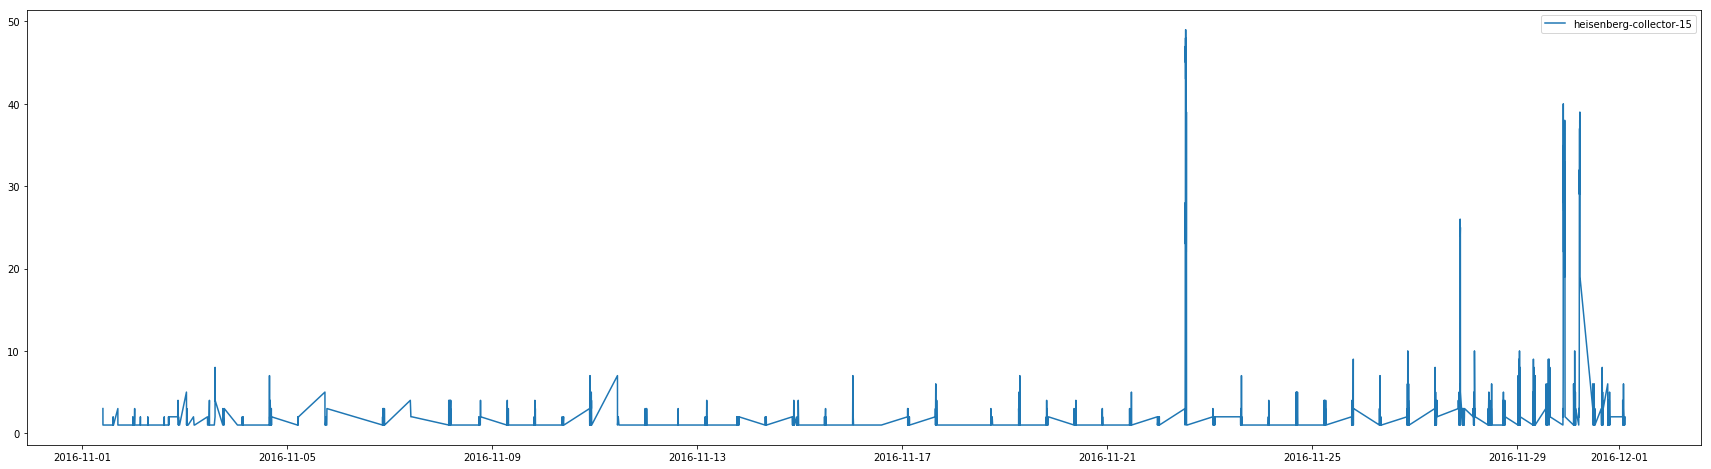

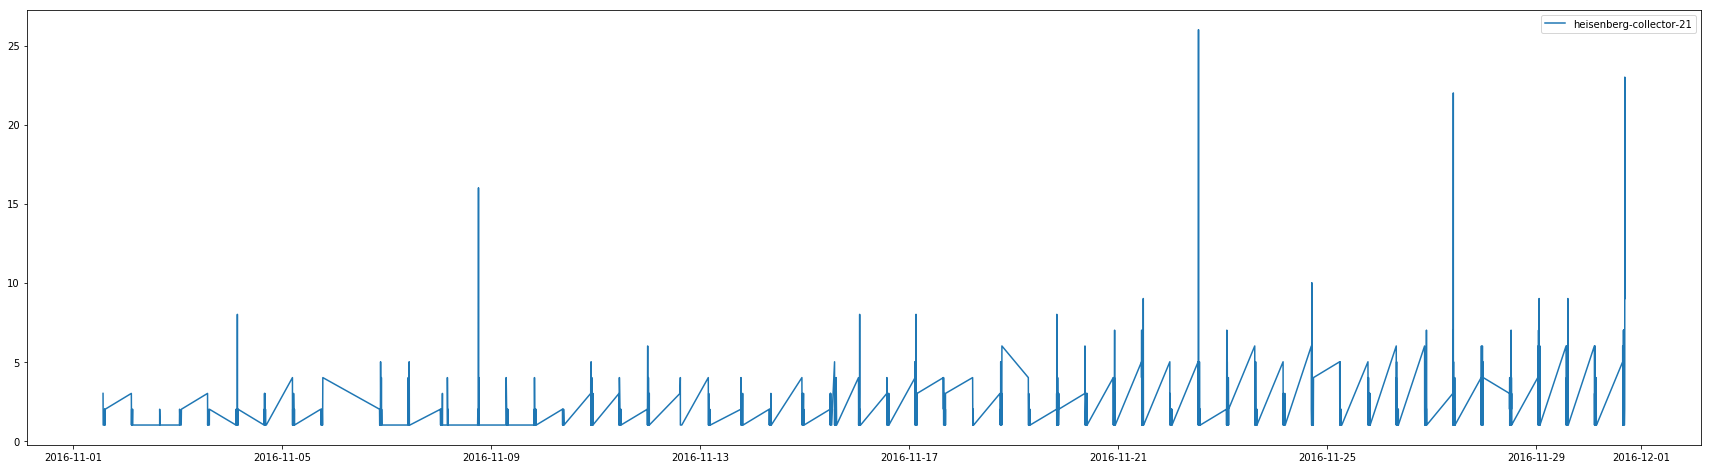

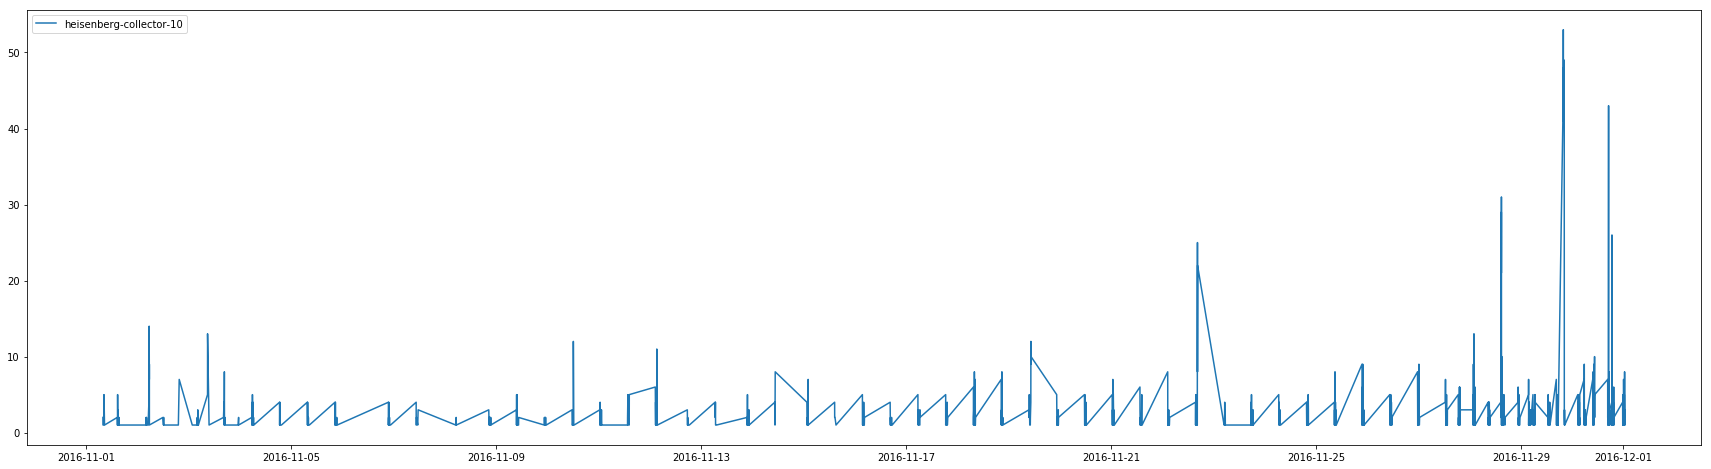

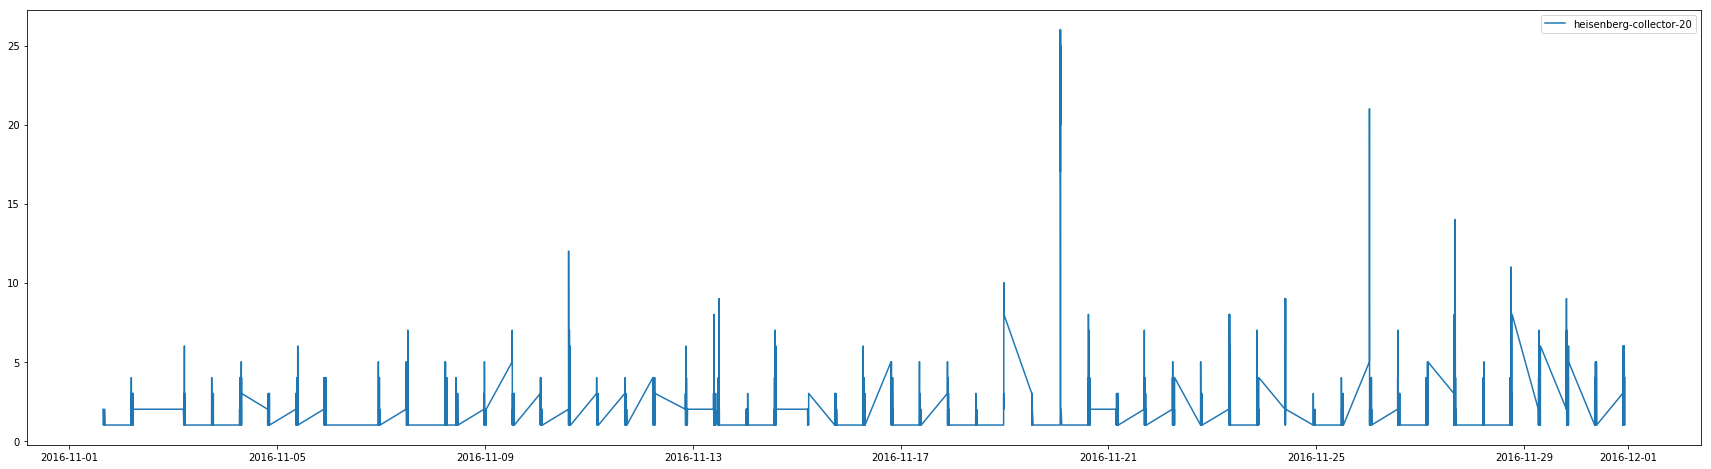

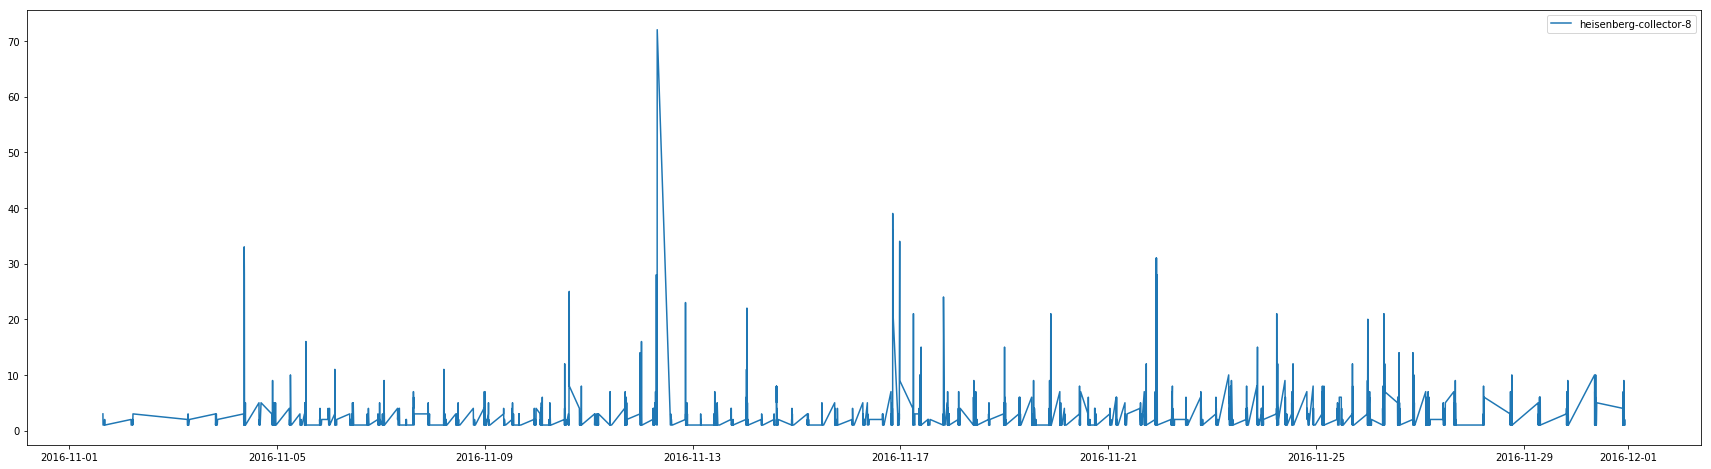

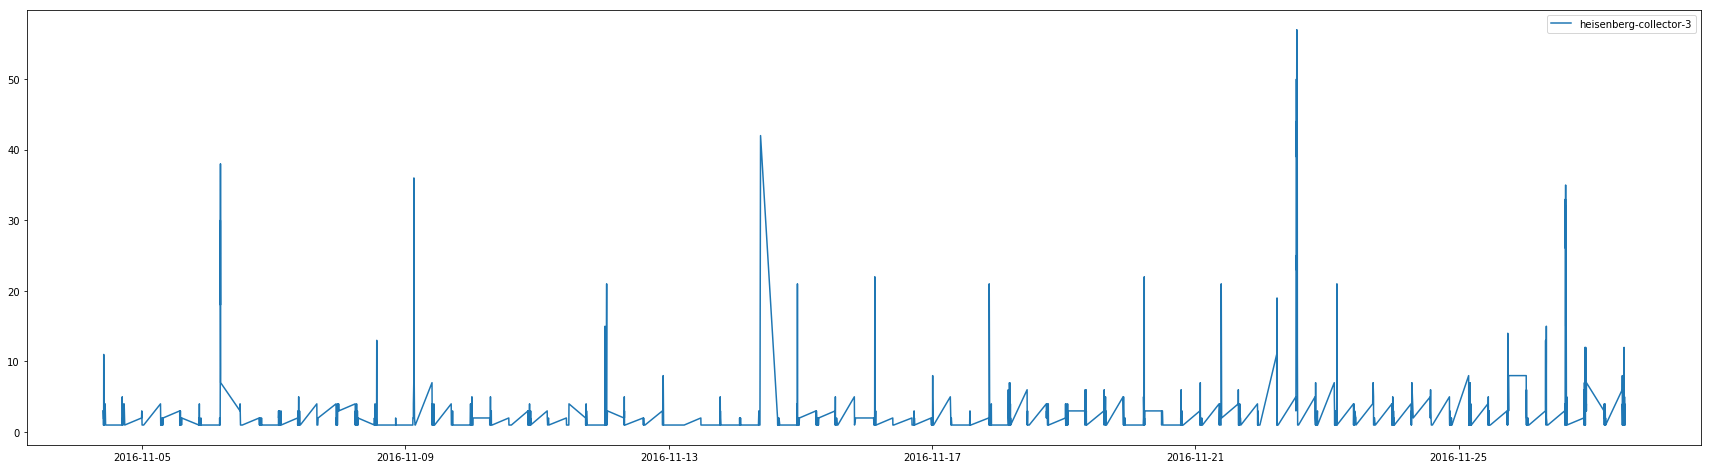

In [36]:
for sensor in sensor_names:
    sensor_counts = pwd_df.loc[pwd_df['sensor'] == sensor].ts.value_counts().sort_index()
    plt.figure(figsize=(30,8))
    sns.lineplot(data=sensor_counts, label=sensor)

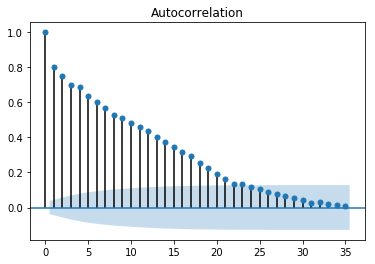

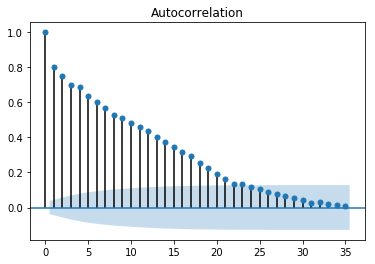

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

df18 = pwd_df.loc[pwd_df['sensor'] == "heisenberg-collector-18"]
plot_acf(df18.ts.value_counts().sort_index())

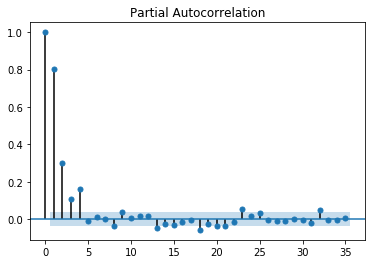

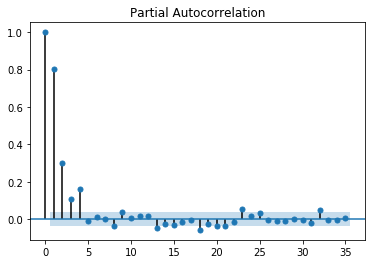

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df18.ts.value_counts().sort_index())

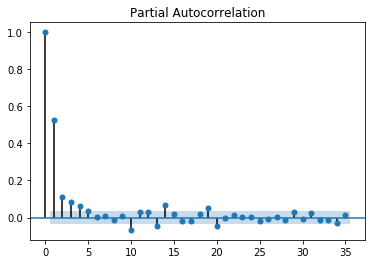

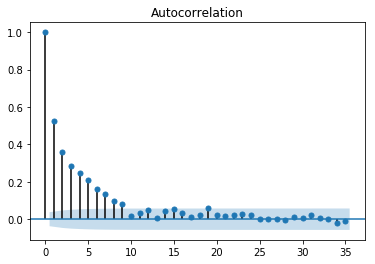

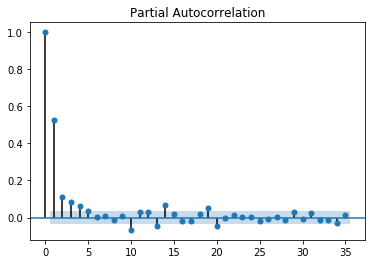

In [41]:
df8 = pwd_df.loc[pwd_df['sensor'] == "heisenberg-collector-8"]
plot_acf(df8.ts.value_counts().sort_index())
plot_pacf(df8.ts.value_counts().sort_index())